## Imports

In [26]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt  
from time import time
from datetime import datetime
#from matplotlib import pyplot
import random
from tqdm import tqdm

import pandas as pd  #
import time
import csv
import numpy as np
import pylab

# Given you have done all the above properly, this should run perfectly
import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing

from scipy.fft import fft, ifft

## Y Data

Explination of Data:

    * Mean of individual sensors:                    | 'm1','m2','m3','m4''m5''m6''m7''m8''m9',
    
    * Total mean over all sensors:                   | 'mt',
    
    * Standard Deviation of Individual sensors:      | 'st1','st2','st3','st4','st5','st6','st7','st8','st9',
    
    * Total Standard Deviation of all sensors:       | 'std',
    
    * variance of individual sensors:                | 'va1','va2','va3','va4','va5','va6','va7','va8','va9',
    
    * total variance of all sensors:                 | 'var',
    
    * Mean absolute Deviation of individual sensors: | 'ma1','ma2','ma3','ma4','ma5','ma6','ma7','ma8','ma9',
    
    * Mean absolute Deviation over all sensors:      | 'mad',
    
    * Max of individual sensors:                     | 'max1','max2','max3','max4','max5','max6','max7',
     *                                               | 'max8','max9',
    
    * Max over all sensors:                          | 'maxt',
    
    * Min of individual sensors:                     | 'min1','min2','min3','min4','min5','min6','min7',
     *                                               | 'min8','min9',
    
    * Min over all sensrs:                           | 'mint',
    
    * range of individual sensors:                   | 'ran1','ran2','ran3','ran4','ran5','ran6','ran7',
     *                                               | 'ran8','ran9',
    
    * Total Range over all sensors:                  | 'rant',
    
    * Sum maximum area over all sensors:             | 'sma', 
    
    * Energy of Individual sensors:                  | 'e1','e2','e3','e4','e5','e6','e7','e8','e9',
    
    * Evergy over all sensors:                       | 'et',
    
    * Interquartile range of individual sensors:     | 'iq1','iq2','iq3','iq4','iq5','iq6','iq7','iq8','iq9',
    
    * Interquartile range over all sensors:          | 'iqrt']
    
    * This same pattern holds true for fft transformed data

In [79]:
df_y_import = pd.read_csv(r'data/eskin_output.csv',header=None)
df_y_import = pd.DataFrame(df_y_import)
df_y_import.columns = ['label']
df_y_import.head()

,label
0,rub
1,rub
2,rub
3,stroke
4,poke


In [80]:
df_y = df_y_import.replace('poke',1)
df_y = df_y.replace('rub',2)
df_y = df_y.replace('slap',3)
df_y = df_y.replace('stroke',4)
df_y.value_counts()

label
1        1440
2        1440
3        1440
4        1440
dtype: int64

## Stat Data

Load stat data 

In [29]:
df_stat = pd.read_csv(r'data/eskin_stats.csv',header=None)
df_stat = pd.DataFrame(df_stat)
df_stat.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,52.177778,41.044444,44.522222,59.300000,73.244444,60.322222,56.977778,69.855556,55.388889,56.981481,...,15.00,12.75,14.00,17.75,17.50,13.75,21.50,29.00,21.50,17.00
1,65.988889,68.444444,58.200000,61.166667,70.088889,59.588889,51.922222,45.711111,44.688889,58.422222,...,13.00,20.75,14.00,18.00,20.75,16.00,19.75,12.00,11.00,19.00
2,52.088889,43.633333,44.533333,83.066667,67.933333,52.477778,52.411111,45.533333,44.933333,54.067901,...,14.75,15.50,12.75,22.50,20.75,15.00,16.75,12.75,13.00,15.75
3,76.633333,55.400000,63.288889,154.366667,107.688889,92.022222,102.311111,68.300000,64.022222,87.114815,...,33.25,16.00,14.75,204.50,114.00,71.75,110.00,47.25,30.75,63.50
4,41.700000,31.333333,41.577778,44.500000,35.677778,65.966667,79.611111,30.533333,47.644444,46.504938,...,9.75,13.75,8.00,10.75,13.00,32.00,12.00,20.75,8.00,13.00


In [30]:
res_stat = df_stat
stats_col = ['m1','m2','m3','m4','m5','m6','m7','m8','m9','mt',
             'st1','st2','st3','st4','st5','st6','st7','st8','st9','std',
             'va1','va2','va3','va4','va5','va6','va7','va8','va9','var',
             'ma1','ma2','ma3','ma4','ma5','ma6','ma7','ma8','ma9','mad',
             'max1','max2','max3','max4','max5','max6','max7','max8','max9','maxt',
             'min1','min2','min3','min4','min5','min6','min7','min8','min9','mint',
             'ran1','ran2','ran3','ran4','ran5','ran6','ran7','ran8','ran9','rant',
             'sma','e1','e2','e3','e4','e5','e6','e7','e8','e9','et',
             'iq1','iq2','iq3','iq4','iq5','iq6','iq7','iq8','iq9','iqrt']

res_stat.columns = stats_col 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(res_stat, df_y, test_size=0.20, random_state=42)

In [32]:
%%time

rf = RandomForestRegressor(n_estimators=100,verbose=True)
rf.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 15.6 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.5s finished


RandomForestRegressor(verbose=True)

In [33]:
rf.feature_importances_

array([8.11153482e-04, 1.35843810e-03, 9.65238307e-04, 3.04824450e-04,
       3.84325166e-04, 3.22476288e-04, 3.06732763e-04, 1.27165363e-03,
       2.63997879e-04, 7.34905641e-04, 1.18597911e-03, 7.79081033e-04,
       2.54376588e-04, 7.23744284e-04, 2.61106179e-03, 3.82759113e-04,
       9.07937971e-04, 9.84992585e-04, 6.85263344e-04, 6.63659336e-04,
       7.72806272e-04, 6.33607424e-04, 2.68610406e-04, 4.62127509e-04,
       2.12251305e-03, 4.43185251e-04, 9.50789798e-04, 9.03615066e-04,
       6.80208782e-04, 7.75077703e-04, 8.35367112e-04, 7.09089668e-04,
       2.88001172e-04, 5.17920541e-04, 6.02579204e-04, 7.75292968e-04,
       4.24849435e-04, 4.13215752e-04, 1.94647153e-03, 6.55042060e-01,
       1.73161352e-03, 4.24145472e-03, 5.04309253e-03, 9.45648403e-03,
       4.06662366e-03, 3.06698397e-03, 6.03717087e-04, 1.80768513e-03,
       6.18959553e-04, 1.03147551e-03, 5.32842447e-04, 2.00409939e-03,
       2.67280009e-04, 5.48324094e-04, 8.33528875e-04, 5.10945745e-04,
      

<BarContainer object of 91 artists>

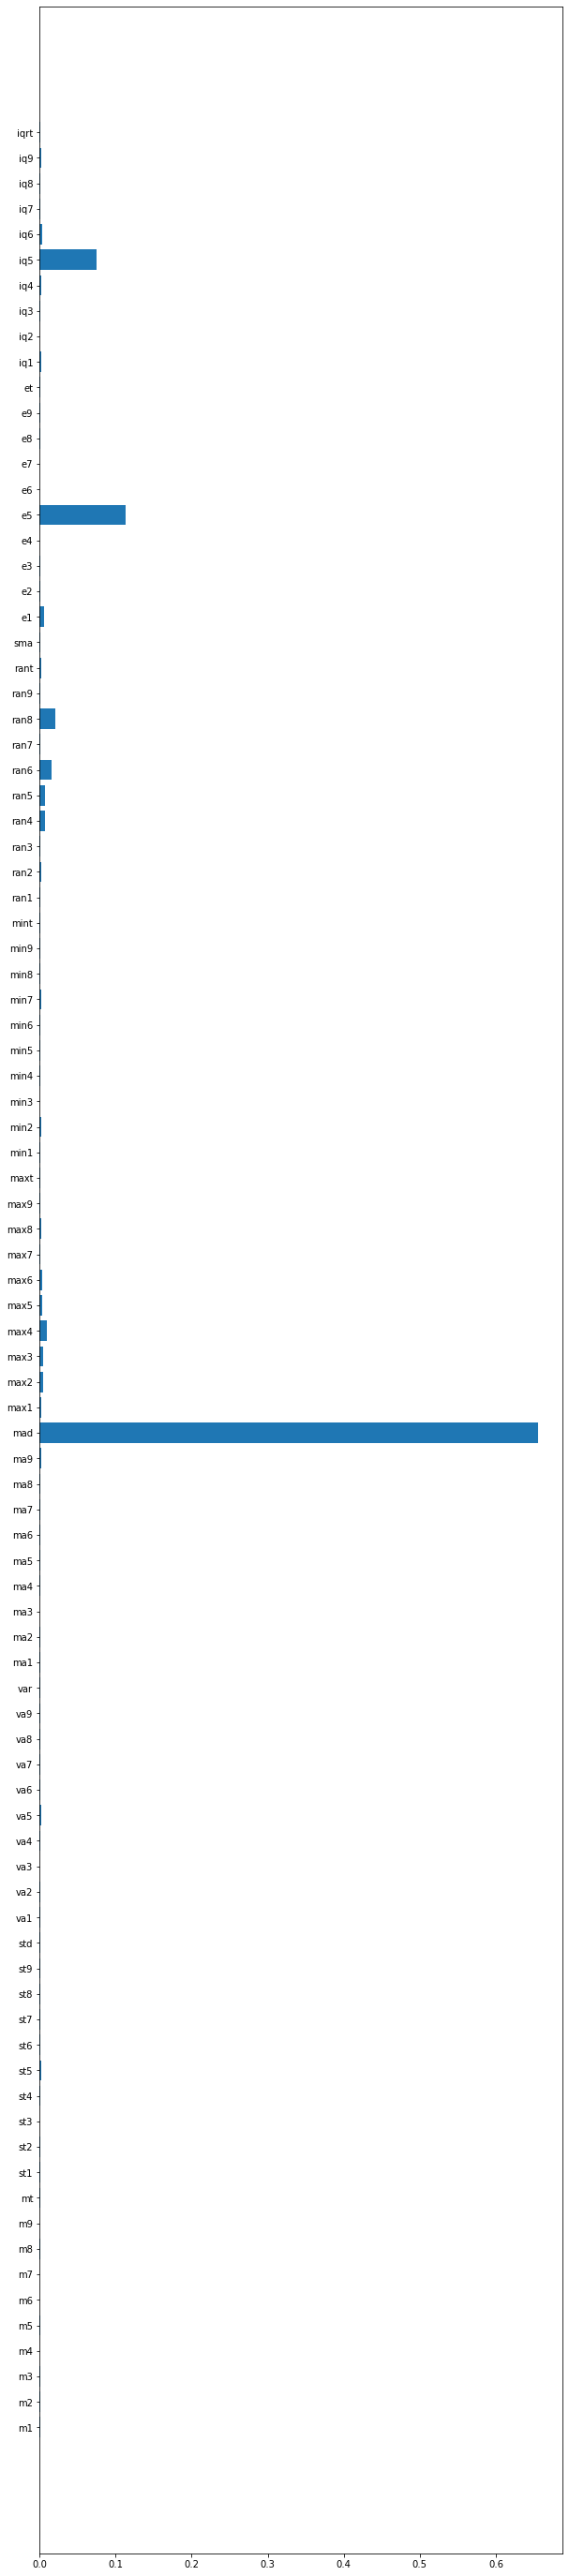

In [34]:
plt.figure(figsize=(10,50))
plt.barh(stats_col, rf.feature_importances_)
#plt.figure(figsize=(10,50))

Text(0.5, 0, 'Random Forest Feature Importance')

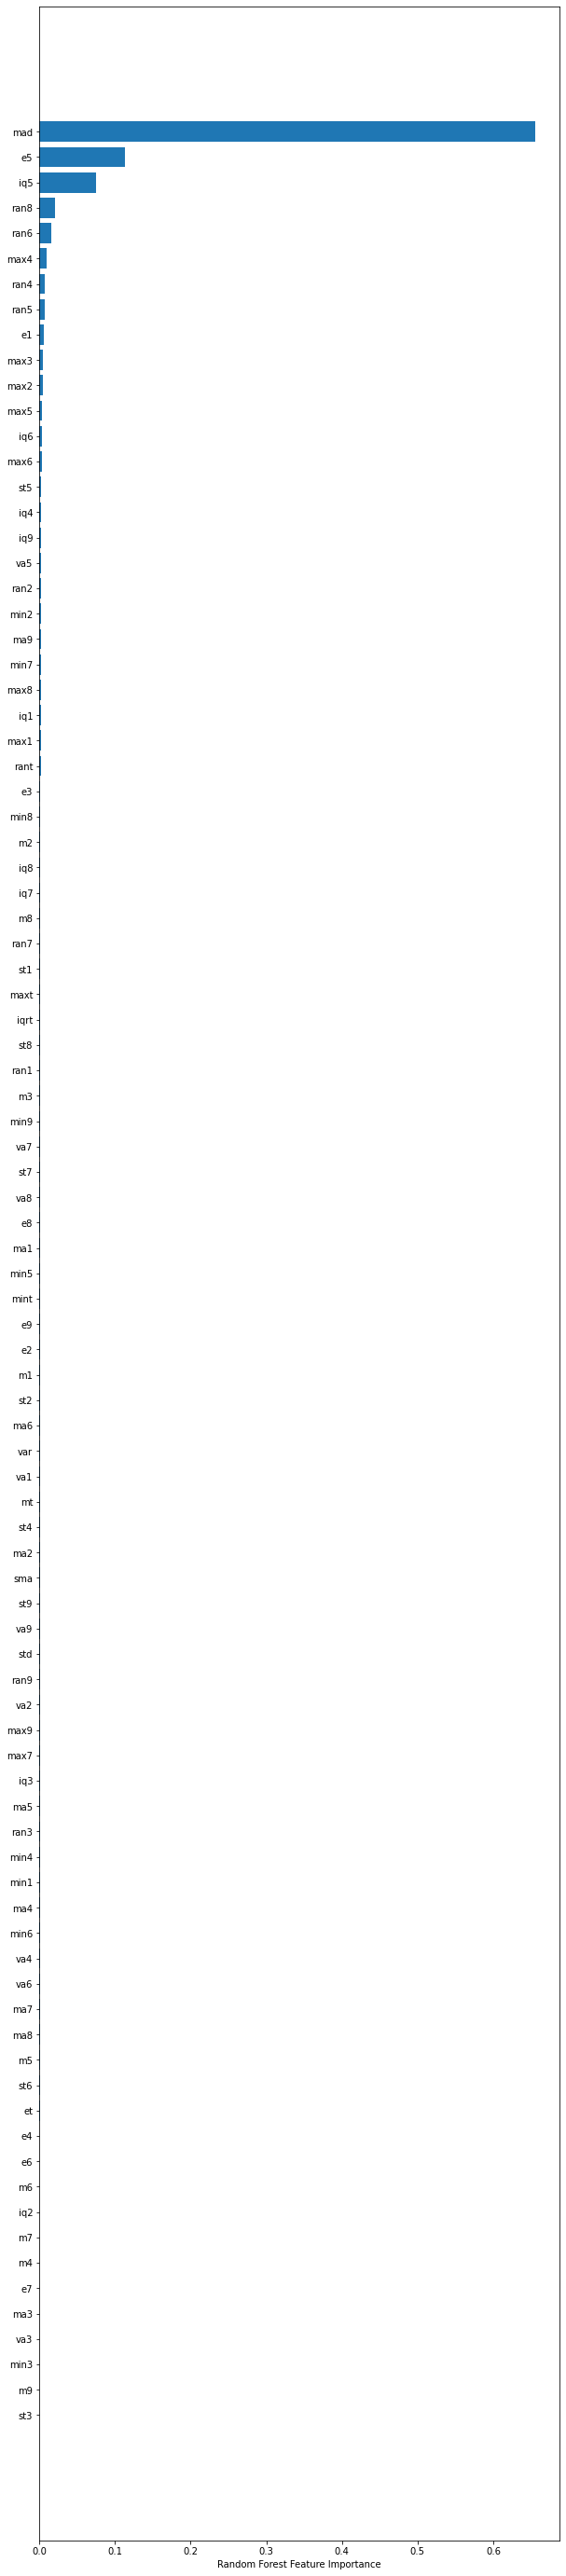

In [35]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10,50))
plt.barh(np.array(stats_col)[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Conclusion gained from this: the mad, energy, iq,range, maxes are important

## FFT

In [36]:
si = pd.read_csv(r'data/eskin_stats_fft.csv',header=None)
si = pd.DataFrame(si)

for t in si.columns:
    #print(si[t].dtypes)
    if si[t].dtypes == 'object':
        #print(si[t])
        si[t] = si[t].str.replace('i','j')
        si[t] = si[t].str.replace(' ','')
        si[t] = si[t].str.replace('\ndtype:complex128','')
        si[t] = si[t].str.replace('\ndtype:float64','')
        si[t] = si[t].str.replace('NaN','')
        si[t] = si[t].str.replace('0-','-')
        si[t] = si[t].str.replace(')','')
        si[t] = si[t].str.replace('(','')
        #print(si[t])
        si[t] = si[t].apply(lambda x: np.complex(x))
        #print(si[t])
res_fft = si

C:\Users\16618\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
C:\Users\16618\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  from ipykernel import kernelapp as app


In [37]:
fft_col = ['f_m1','f_m2','f_m3','f_m4','f_m5','f_m6','f_m7','f_m8','f_m9','f_mt',
             'f_st1','f_st2','f_st3','f_st4','f_st5','f_st6','f_st7','f_st8','f_st9','f_std',
             'f_va1','f_va2','f_va3','f_va4','f_va5','f_va6','f_va7','f_va8','f_va9','f_var',
             'f_ma1','f_ma2','f_ma3','f_ma4','f_ma5','f_ma6','f_ma7','f_ma8','f_ma9','f_mad',
             'f_max1','f_max2','f_max3','f_max4','f_max5','f_max6','f_max7','f_max8','f_max9','f_maxt',
             'f_min1','f_min2','f_min3','f_min4','f_min5','f_min6','f_min7','f_min8','f_min9','f_mint',
             'f_ran1','f_ran2','f_ran3','f_ran4','f_ran5','f_ran6','f_ran7','f_ran8','f_ran9','f_rant',
             'f_sma','f_e1','f_e2','f_e3','f_e4','f_e5','f_e6','f_e7','f_e8','f_e9','f_et',
             'f_iq1','f_iq2','f_iq3','f_iq4','f_iq5','f_iq6','f_iq7','f_iq8','f_iq9','f_iqrt']

res_fft.columns = fft_col

In [38]:
np.array(fft_col)

array(['f_m1', 'f_m2', 'f_m3', 'f_m4', 'f_m5', 'f_m6', 'f_m7', 'f_m8',
       'f_m9', 'f_mt', 'f_st1', 'f_st2', 'f_st3', 'f_st4', 'f_st5',
       'f_st6', 'f_st7', 'f_st8', 'f_st9', 'f_std', 'f_va1', 'f_va2',
       'f_va3', 'f_va4', 'f_va5', 'f_va6', 'f_va7', 'f_va8', 'f_va9',
       'f_var', 'f_ma1', 'f_ma2', 'f_ma3', 'f_ma4', 'f_ma5', 'f_ma6',
       'f_ma7', 'f_ma8', 'f_ma9', 'f_mad', 'f_max1', 'f_max2', 'f_max3',
       'f_max4', 'f_max5', 'f_max6', 'f_max7', 'f_max8', 'f_max9',
       'f_maxt', 'f_min1', 'f_min2', 'f_min3', 'f_min4', 'f_min5',
       'f_min6', 'f_min7', 'f_min8', 'f_min9', 'f_mint', 'f_ran1',
       'f_ran2', 'f_ran3', 'f_ran4', 'f_ran5', 'f_ran6', 'f_ran7',
       'f_ran8', 'f_ran9', 'f_rant', 'f_sma', 'f_e1', 'f_e2', 'f_e3',
       'f_e4', 'f_e5', 'f_e6', 'f_e7', 'f_e8', 'f_e9', 'f_et', 'f_iq1',
       'f_iq2', 'f_iq3', 'f_iq4', 'f_iq5', 'f_iq6', 'f_iq7', 'f_iq8',
       'f_iq9', 'f_iqrt'], dtype='<U6')

In [39]:
res_fft = res_fft.applymap(np.absolute)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(res_fft, df_y, test_size=0.20, random_state=42)

In [41]:
rf = RandomForestRegressor(n_estimators=100,verbose=True)
rf.fit(X_train, y_train)

C:\Users\16618\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.1s finished


RandomForestRegressor(verbose=True)

In [42]:
rf.feature_importances_

array([3.82944535e-03, 4.86212516e-04, 4.95851800e-04, 3.64437679e-04,
       3.14665101e-04, 4.71148825e-04, 4.93271231e-04, 6.27664276e-04,
       5.92979943e-04, 1.05732494e-03, 1.53253081e-03, 7.65878400e-04,
       3.71901530e-04, 4.06048793e-04, 1.99727146e-04, 2.60024444e-04,
       3.11503273e-04, 3.81515434e-04, 5.75152381e-04, 8.02689735e-03,
       1.27907931e-03, 4.63386969e-04, 2.70535722e-04, 4.70461578e-04,
       3.63914368e-04, 2.89415481e-04, 5.08195327e-04, 3.96259031e-04,
       4.20610909e-04, 5.51429859e-03, 1.63914017e-03, 1.06008100e-03,
       1.00510606e-03, 1.72793831e-03, 5.82323005e-03, 5.53548350e-03,
       1.92195175e-03, 1.10588651e-03, 1.03656751e-03, 1.09186073e-03,
       1.08778582e-02, 1.22014449e-03, 9.50180269e-04, 1.45903409e-03,
       7.30146380e-03, 6.84971387e-03, 1.39757399e-03, 9.78239191e-04,
       1.38524169e-03, 1.27080404e-02, 3.56564323e-03, 8.97572247e-03,
       1.31889214e-03, 9.68920958e-04, 1.48634900e-02, 1.58962050e-02,
      

<BarContainer object of 91 artists>

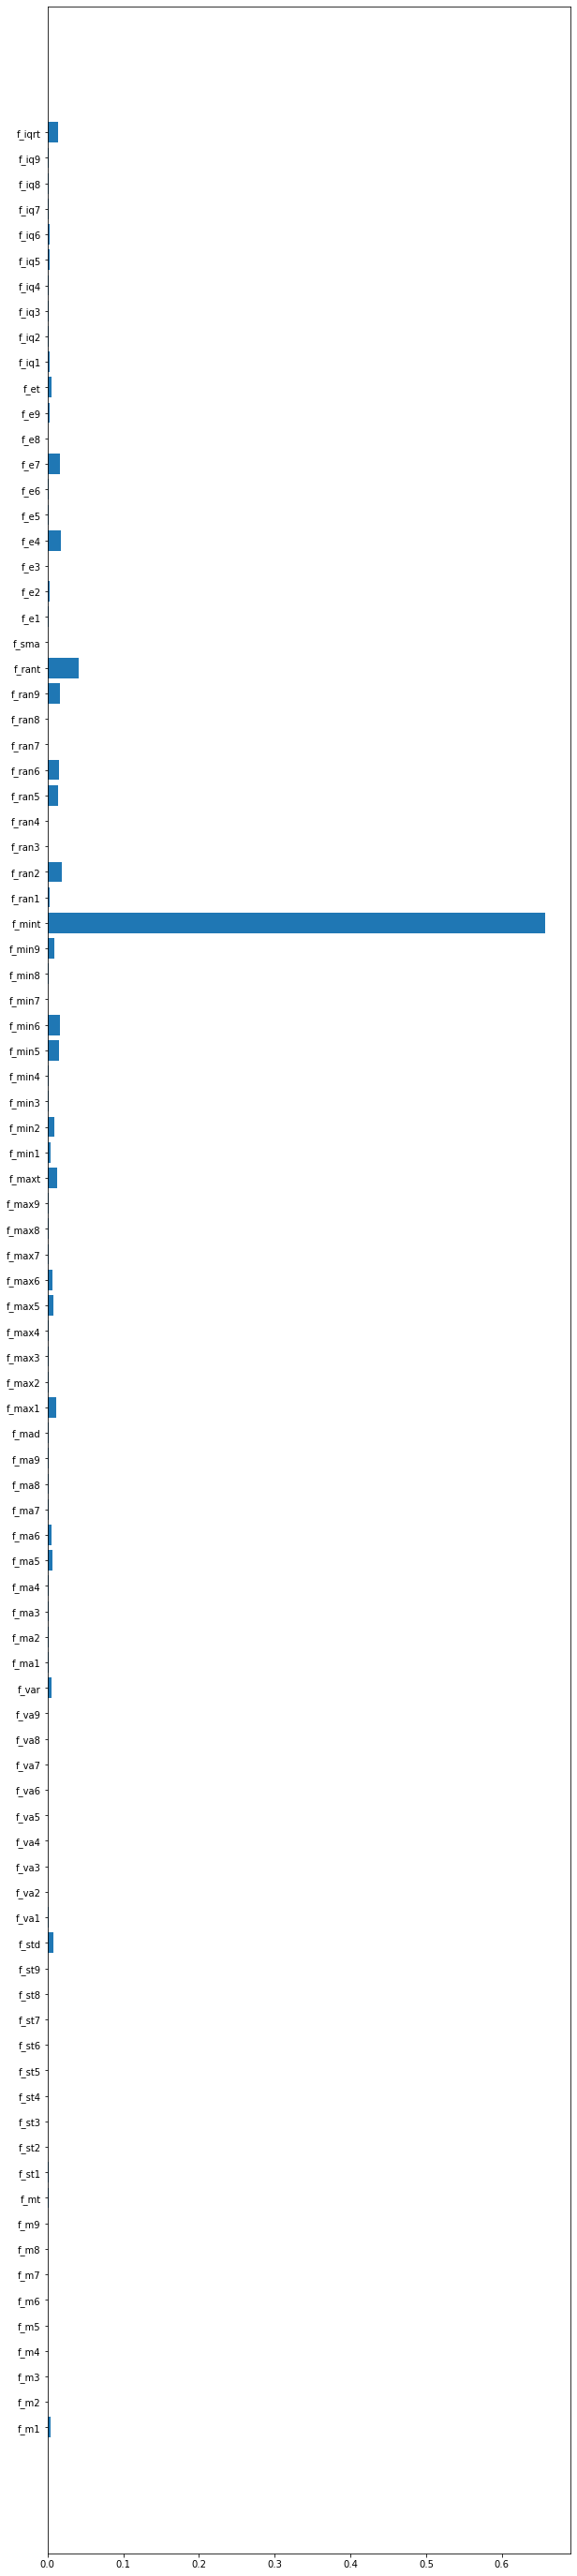

In [43]:
plt.figure(figsize=(10,50))
plt.barh(fft_col, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

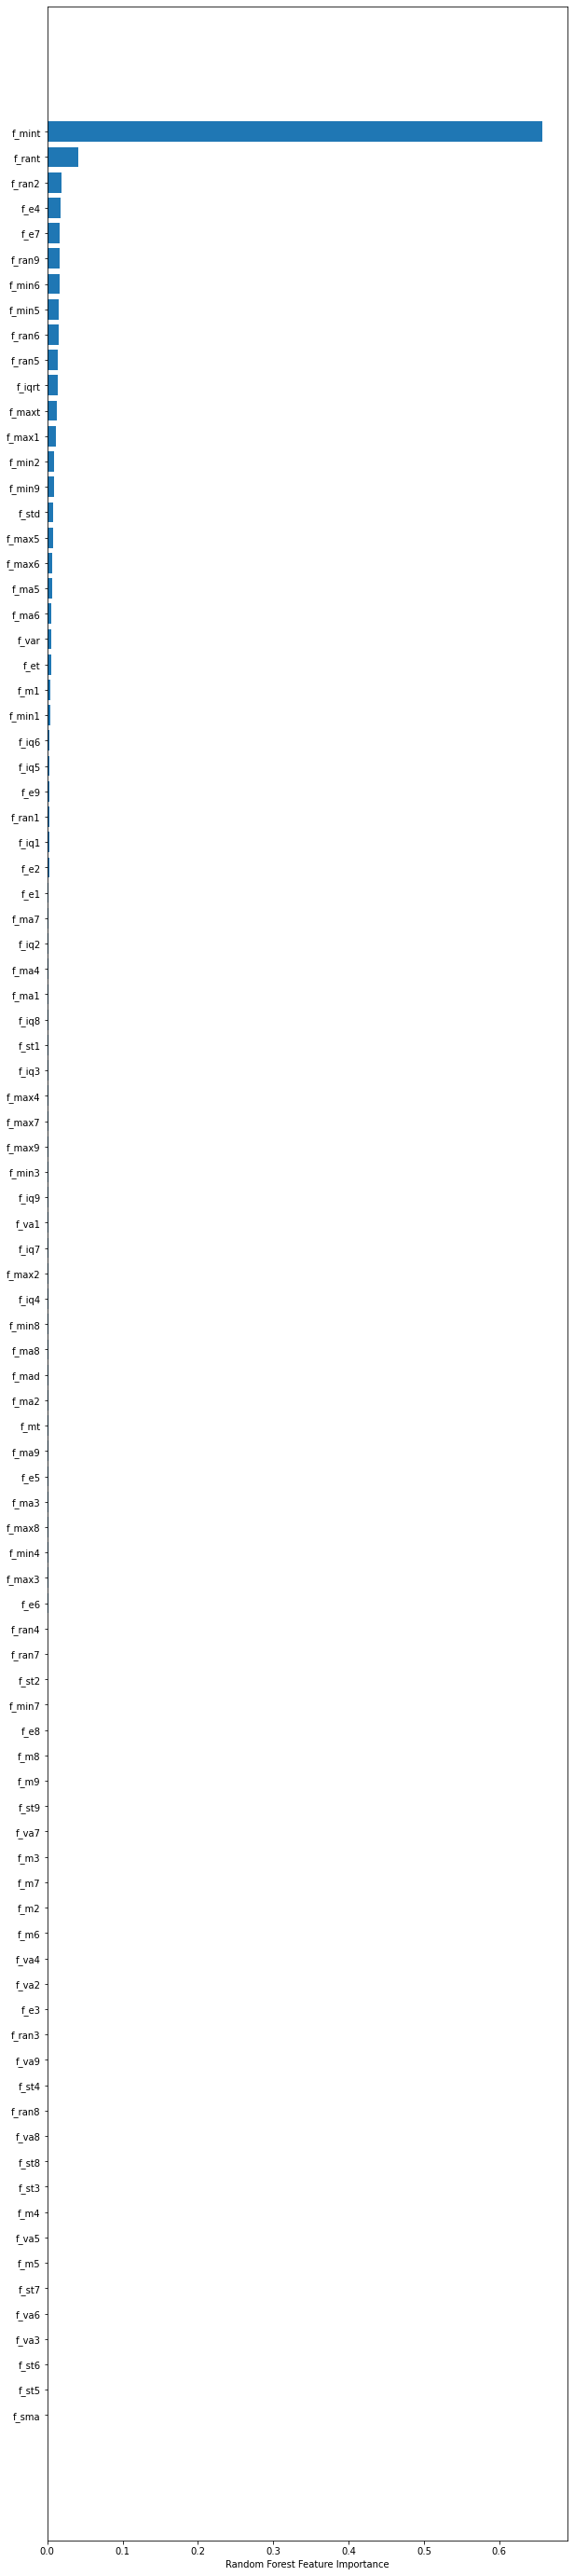

In [44]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10,50))
plt.barh(np.array(fft_col)[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Graphing most important Features

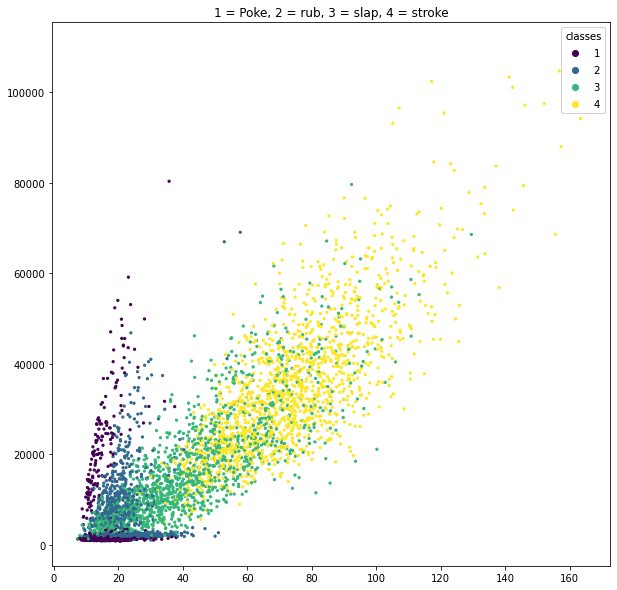

In [106]:
data2g1 = res_stat['mad'] 
data2g2 = res_stat['e5'] 
data2gL = df_y['label']

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(data2g1,data2g2,c=data2gL.values,s=5)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right",title="classes")
ax.title.set_text('1 = Poke, 2 = rub, 3 = slap, 4 = stroke')
ax.add_artist(legend1)

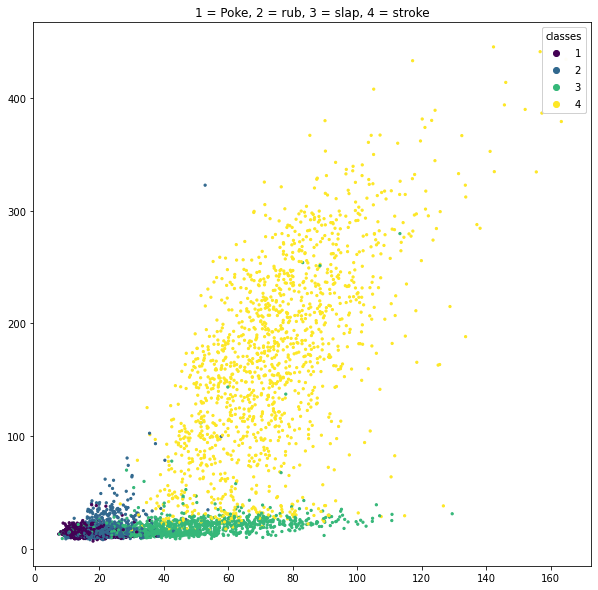

In [107]:
data2g1 = res_stat['mad'] 
data2g2 = res_stat['iq5'] 
data2gL = df_y['label']

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(data2g1,data2g2,c=data2gL.values,s=5)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right",title="classes")
ax.title.set_text('1 = Poke, 2 = rub, 3 = slap, 4 = stroke')
ax.add_artist(legend1)

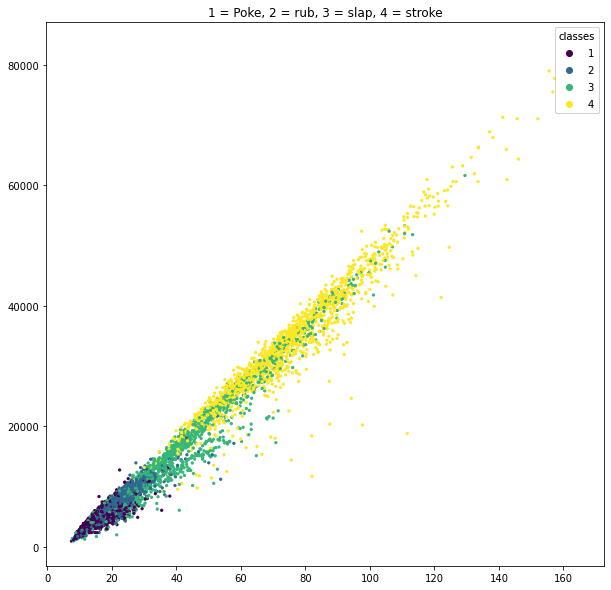

In [108]:
data2g1 = res_stat['mad'] 
data2g2 = res_fft['f_mint'] 
data2gL = df_y['label']

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(data2g1,data2g2,c=data2gL.values,s=5)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right",title="classes")
ax.title.set_text('1 = Poke, 2 = rub, 3 = slap, 4 = stroke')
ax.add_artist(legend1)

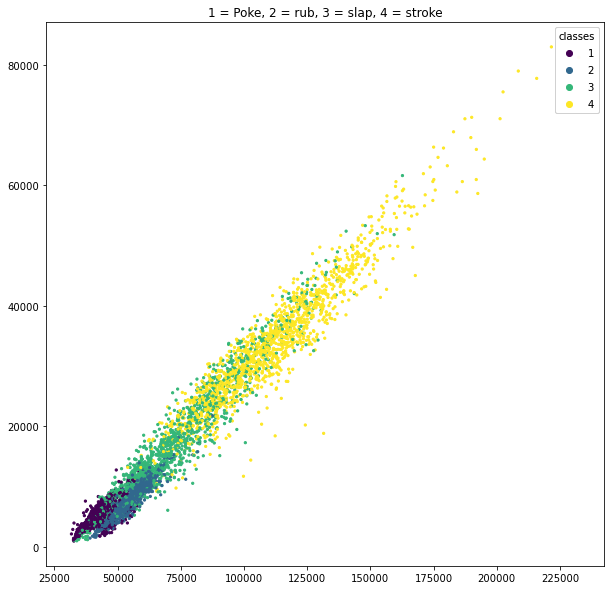

In [109]:
data2g1 = res_fft['f_rant'] 
data2g2 = res_fft['f_mint'] 
data2gL = df_y['label']

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(data2g1,data2g2,c=data2gL.values,s=5)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right",title="classes")
ax.title.set_text('1 = Poke, 2 = rub, 3 = slap, 4 = stroke')
ax.add_artist(legend1)

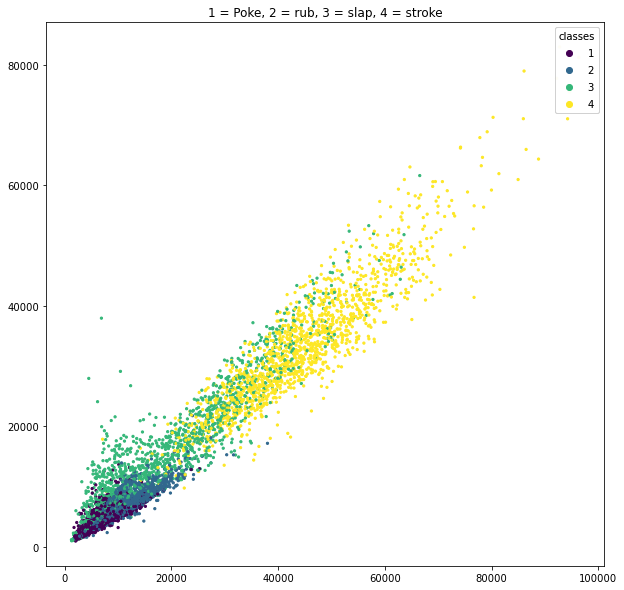

In [110]:
data2g1 = res_fft['f_ran2'] 
data2g2 = res_fft['f_mint'] 
data2gL = df_y['label']

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(data2g1,data2g2,c=data2gL.values,s=5)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right",title="classes")
ax.title.set_text('1 = Poke, 2 = rub, 3 = slap, 4 = stroke')
ax.add_artist(legend1)

In [111]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

In [112]:
features

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       